In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path 

plot = False

In [2]:
# PATH TO TO DATA DIR

path_to_data = Path("./outputs_16k/")

In [3]:
# LOAD RIRs

path_to_rirs_hdf = path_to_data / Path('dEchorate_rir.h5')
rir_dset = h5py.File(path_to_rirs_hdf, mode='r')

signals = list(rir_dset.keys())
print('Signals in this dataset:', signals)

rooms = list(rir_dset[signals[0]].keys())
print('Rooms in this dataset:', rooms)

sources = list(rir_dset[signals[0]][rooms[0]].keys())
print('Sources in this dataset:', sources)

print('RIR matrix shape', rir_dset[signals[0]][rooms[0]][sources[0]].shape)
print('31 mics = 30 mics + 1 control signals!')

Signals in this dataset: ['rir']
Rooms in this dataset: ['000000', '000001', '000010', '000100', '001000', '010000', '011000', '011100', '011110', '011111', '020002']
Sources in this dataset: ['1', '2', '3', '4', '5', '6', '7', '8', '9']
RIR matrix shape (48000, 31)
31 mics = 30 mics + 1 control signals!


In [4]:
# PRINT DSET ATTRIBUTES

for attr in rir_dset.attrs:
    print(f'{attr} :', rir_dset.attrs[attr])


fs = rir_dset.attrs['sampling_rate']
print('Sampling rate:', fs)

data_dim_names : ['n_samples' 'n_mics' '(n_utts)']
n_mics : 31
n_samples : 48000
n_srcs : 9
n_utts : 1
sampling_rate : 48000
signal : rirs
Sampling rate: 48000


In [5]:
# LOAD ANNOTATIONs

path_to_echo_h5 = path_to_data / Path('dEchorate_annotations.h5')
note_dset = h5py.File(path_to_echo_h5, 'r')
# let s check the content of this annotation dataset
for key in note_dset:
    print(f'{key} :', note_dset[key][()].shape)


arrays_direction : (3, 6)
arrays_position : (3, 6)
echo_amp : (7, 30, 6)
echo_toa : (7, 30, 6)
echo_wall : (7, 30, 6)
microphones : (3, 30)
room_size : (3,)
sources_directional_direction : (3, 6)
sources_directional_position : (3, 6)
sources_noise_direction : (3, 4)
sources_noise_position : (3, 4)
sources_omnidirection_position : (3, 3)


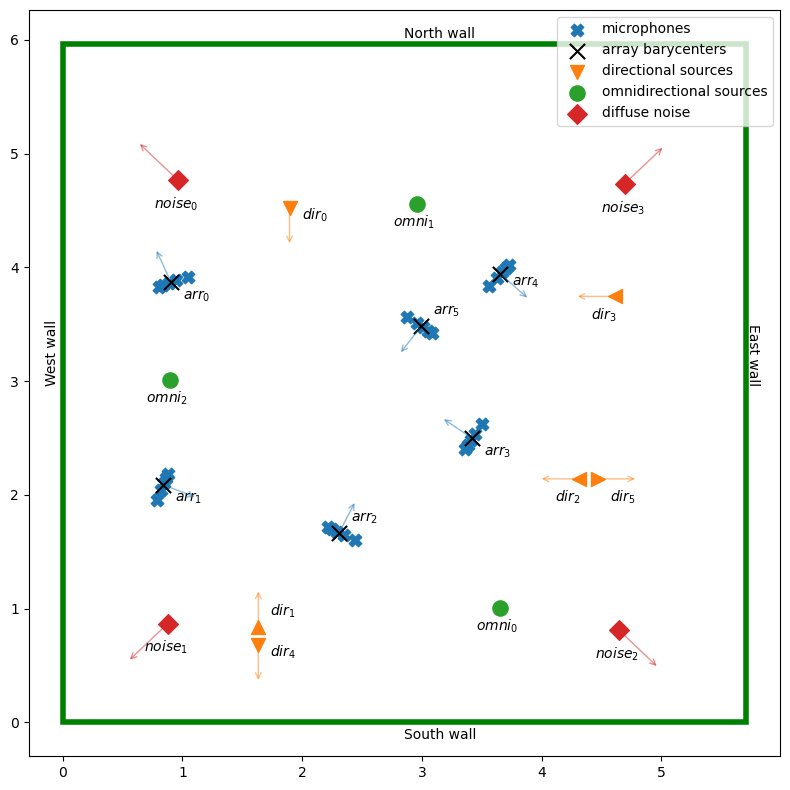

In [6]:
# DRAW GEOMETRY in 2D

room_size = note_dset['room_size']
mics = note_dset['microphones']
arrs = note_dset['arrays_position']
arrs_view = note_dset['arrays_direction']
srcs_dir = note_dset['sources_directional_position']
srcs_dir_view = note_dset['sources_directional_direction']
srcs_nse = note_dset['sources_noise_position']
srcs_nse_view = note_dset['sources_noise_direction']
srcs_omn = note_dset['sources_omnidirection_position']

m = { # marker type
    'arrs' : 'x',
    'mics' : 'X',
    'srcs_dir' : 'v',
    'srcs_omn' : 'o',
    'srcs_nse' : 'D',
}
s = { # marker size
    'arrs' : 120,
    'mics' : 80,
    'srcs_dir' : 100,
    'srcs_omn' : 120,
    'srcs_nse' : 100,
}
c = { # colors
    'arrs' : 'k',
    'mics' : 'C0',
    'srcs_dir' : 'C1',
    'srcs_omn' : 'C2',
    'srcs_nse' : 'C3',
}
l = { # labels
    'arrs' : 'array barycenters',
    'mics' : 'microphones',
    'srcs_dir' : 'directional sources',
    'srcs_omn' : 'omnidirectional sources',
    'srcs_nse' : 'diffuse noise',
}

plt.figure(figsize=(8,8))

# Plot ROOM
plt.gca().add_patch(
    plt.Rectangle((0, 0),
                room_size[0], room_size[1], fill=False,
                edgecolor='g', linewidth=4)
)
plt.text(room_size[0]/2, -0.15, 'South wall')
plt.text(room_size[0]/2,   room_size[1] + 0.05, 'North wall')
plt.text(-0.15, room_size[1]/2, 'West wall', rotation=90)
plt.text(room_size[0], room_size[1]/2, 'East wall', rotation=-90)


plt.scatter(mics[0, :], mics[1, :], marker=m['mics'], s=s['mics'], c=c['mics'], label=l['mics'])
plt.scatter(arrs[0, :], arrs[1, :], marker=m['arrs'], s=s['arrs'], c=c['arrs'], label=l['arrs'])

plt.text(arrs[0, 0]+0.1, arrs[1, 0]-0.15, r'$arr_%d$' %0)
plt.text(arrs[0, 1]+0.1, arrs[1, 1]-0.15, r'$arr_%d$' %1)
plt.text(arrs[0, 2]+0.1, arrs[1, 2]+0.10, r'$arr_%d$' %2)
plt.text(arrs[0, 3]+0.1, arrs[1, 3]-0.15, r'$arr_%d$' %3)
plt.text(arrs[0, 4]+0.1, arrs[1, 4]-0.1,  r'$arr_%d$' %4)
plt.text(arrs[0, 5]+0.1, arrs[1, 5]+0.1,  r'$arr_%d$' %5)

for a in range(arrs.shape[1]):
    x = arrs[0,a]
    y = arrs[1,a]
    dx = arrs_view[0,a] / 3
    dy = arrs_view[1,a] / 3
    plt.annotate("", xy=(x+dx,y+dy), xytext=(x, y), arrowprops=dict(arrowstyle="->", alpha=0.5, color=c['mics']))

# DIR
plt.scatter(srcs_dir[0, 0], srcs_dir[1, 0], marker='v', s=s['srcs_dir'], c=c['srcs_dir'], label=l['srcs_dir'])
plt.text(srcs_dir[0, 0]+0.1, srcs_dir[1, 0]-0.1, r'$dir_%d$' %0)
plt.text(srcs_dir[0, 1]+0.1, srcs_dir[1, 1]+0.1, r'$dir_%d$' %1)
plt.text(srcs_dir[0, 2]-0.2, srcs_dir[1, 2]-0.2, r'$dir_%d$' %2)
plt.text(srcs_dir[0, 3]-0.2, srcs_dir[1, 3]-0.2, r'$dir_%d$' %3)
plt.text(srcs_dir[0, 4]+0.1, srcs_dir[1, 4]-0.1, r'$dir_%d$' %4)
plt.text(srcs_dir[0, 5]+0.1, srcs_dir[1, 5]-0.2, r'$dir_%d$' %5)

for j in range(srcs_dir_view.shape[1]):
    x = srcs_dir[0,j]
    y = srcs_dir[1,j]
    dx = srcs_dir_view[0,j] / 3
    dy = srcs_dir_view[1,j] / 3
    plt.annotate("", xy=(x+dx,y+dy), xytext=(x, y), arrowprops=dict(arrowstyle="->", alpha=0.5, color=c['srcs_dir']))

# DIR
plt.scatter(srcs_dir[0, 1], srcs_dir[1, 1], marker='^', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 2], srcs_dir[1, 2], marker='<', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 3], srcs_dir[1, 3], marker='<', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 4], srcs_dir[1, 4], marker='v', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 5], srcs_dir[1, 5], marker='>', s=s['srcs_dir'], c=c['srcs_dir'])

# OMNI
plt.scatter(srcs_omn[0, :], srcs_omn[1, :], marker=m['srcs_omn'], s=s['srcs_omn'], c=c['srcs_omn'], label=l['srcs_omn'])
plt.text(srcs_omn[0, 0]-0.2, srcs_omn[1, 0]-0.2, r'$omni_%d$' %0)
plt.text(srcs_omn[0, 1]-0.2, srcs_omn[1, 1]-0.2, r'$omni_%d$' %1)
plt.text(srcs_omn[0, 2]-0.2, srcs_omn[1, 2]-0.2, r'$omni_%d$' %2)


# NOISE
plt.scatter(srcs_nse[0, :], srcs_nse[1, :], marker=m['srcs_nse'], s=s['srcs_nse'], c=c['srcs_nse'], label=l['srcs_nse'])
plt.text(srcs_nse[0, 0]-0.2, srcs_nse[1, 0]-0.25, r'$noise_%d$' %0)
plt.text(srcs_nse[0, 1]-0.2, srcs_nse[1, 1]-0.25, r'$noise_%d$' %1)
plt.text(srcs_nse[0, 2]-0.2, srcs_nse[1, 2]-0.25, r'$noise_%d$' %2)
plt.text(srcs_nse[0, 3]-0.2, srcs_nse[1, 3]-0.25, r'$noise_%d$' %3)

for j in range(srcs_nse_view.shape[1]):
    x = srcs_nse[0,j]
    y = srcs_nse[1,j]
    dx = srcs_nse_view[0,j] / 3
    dy = srcs_nse_view[1,j] / 3
    plt.annotate("", xy=(x+dx,y+dy), xytext=(x, y), arrowprops=dict(arrowstyle="->", alpha=0.5, color=c['srcs_nse']))

plt.legend()
plt.tight_layout()
plt.show()

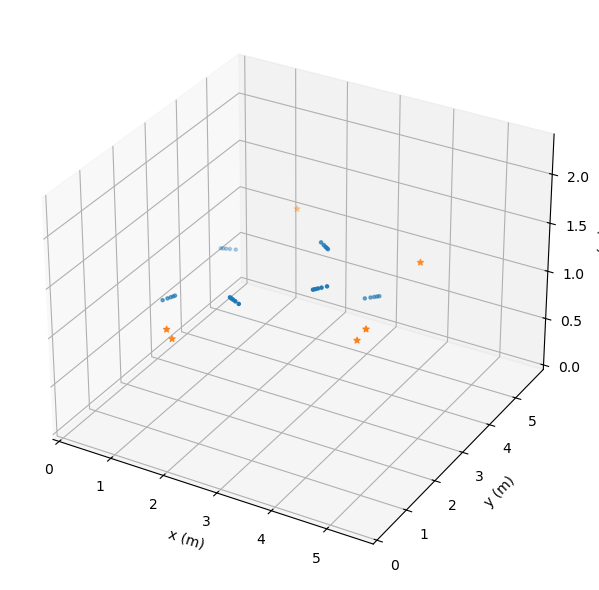

In [7]:
# DRAW GEOMTRY IN 3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(mics[0,:], mics[1,:], mics[2,:], marker='.')
ax.scatter3D(srcs_dir[0,:], srcs_dir[1,:], srcs_dir[2,:], marker='*')
ax.set_xlim([0, room_size[0]])
ax.set_ylim([0, room_size[1]])
ax.set_zlim([0, room_size[2]])
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'RIR [amplitude]')

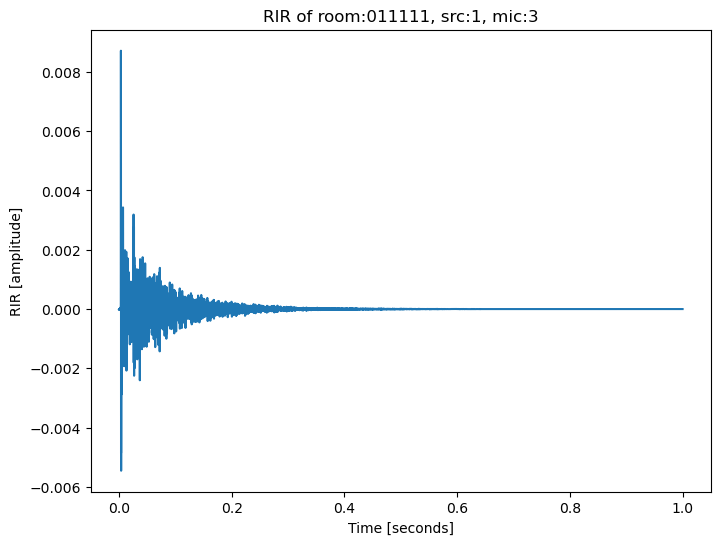

In [8]:
# Plot a RIR
signal = 'rir'
room = '011111'
src = 1
mic = 3
rir = rir_dset['rir']['011111'][str(src)][()][:,mic]

L = rir.shape[0]
time = np.arange(L)/fs

plt.figure(figsize=(8,6))
plt.title(f'RIR of room:{room}, src:{src}, mic:{mic}')
plt.plot(time, rir)
plt.xlabel('Time [seconds]')
plt.ylabel('RIR [amplitude]')

In [9]:
# PLOT RIR SKYLINEs

echo_toa = note_dset['echo_toa']
echo_wall = note_dset['echo_wall']
walls_code_to_name = {
    'd' : 'Direct path',
    'c' : 'Ceiling',
    'e' : 'East',
    'w' : 'West',
    's' : 'South',
    'n' : 'North',
    'f' : 'Floor'
}

for room in rooms:
    rirs = np.stack([rir_dset['rir'][room][s][()] for s in sources], axis=1)
    rirs = rirs[:,:,:-1] # do not use the loopback signal
    n_smpl, n_srcs, n_mics = rirs.shape

    fs = rir_dset.attrs['sampling_rate']
    L = 1500 # visualize on the first L samples

    to_plot = rirs.transpose([0,1,2]).reshape([n_smpl,n_srcs*n_mics])
    to_plot = to_plot / np.max(np.abs(to_plot), axis=0, keepdims=True)
    to_plot = np.abs(to_plot)[:L,:]


    plt.figure(figsize=(16,9))
    plt.title(f'RIR Skyline for room {room}')
    plt.imshow(to_plot, extent=[0, n_mics*n_srcs, L, 0], aspect='auto', interpolation='none', origin='upper')

    # plot srcs boundaries
    for j in range(n_srcs):
        plt.axvline(j*n_mics, color='C7')
        
    # plot peak annotation
    for k in range(echo_toa.shape[0]):
        wall_name = walls_code_to_name[echo_wall[k,0,0].decode('UTF-8')]
        plt.scatter(np.arange(n_mics*6)+0.5, echo_toa[k, :, :].T.flatten()*fs, 
                    c='C%d' % (k+2), marker='x', label=wall_name)

    plt.xlim([0, n_mics * n_srcs])
    plt.ylabel("Samples")
    plt.xlabel("Mics x Srcs")
    plt.legend(loc='lower right', title='Walls')
    plt.savefig(f'room_{room}_rir_skyline.png')
    # plt.show()
    plt.close()

In [10]:
signal = 'speech'
path_h5 = path_to_data / Path(f'dEchorate_{signal}.h5')
dset = h5py.File(path_h5, mode='r')

print('Attributes in the dataset:')
for attr in dset.attrs:
    print(f'{attr} :', dset.attrs[attr])

def normalize(x):
    return x / np.max(np.abs(x), axis=0, keepdims=True)

print('Plot signals')
for room in rooms:
    data = np.stack([dset[signal][room][src][()] for src in dset[signal][room].keys()], axis=1)
    print(data.shape)
    
    fs = dset.attrs['sampling_rate']
    print(room, signal, data.shape, fs)
    time = np.arange(data.shape[0]) / fs
    
    L, J, I, R = data.shape

    time = np.arange(data.shape[0]) / fs
    
    if plot:
        fig, axarr = plt.subplots(J, R, figsize=(16,8))
        for j in range(J):
            for r in range(R):
                axarr[j,r].plot(time, normalize(data[:,j,:-1,r])**2, label="Recorded")
                axarr[j,r].set_ylabel(f"src:{j}")
                axarr[j,r].grid(axis = 'x')
                axarr[j,r].xaxis.set_ticks(np.arange(0,6.5,1))
                axarr[j,r].set_ylim(0,1)
                axarr[j,r].set_xlim(0,6.5)
                if j == 0:
                    axarr[j,r].set_title(f'Utterance #{r+1}')
                
        plt.suptitle(f"Room: {room}")
        plt.tight_layout()
        plt.savefig(f'room_{room}_{signal}_all_mics_srcs.png')
        # plt.show()
        plt.close()
dset.close()

Attributes in the dataset:
data_dim_names : ['n_samples' 'n_mics' '(n_utts)']
n_mics : 31
n_samples : 104000
n_srcs : 9
n_utts : 3
sampling_rate : 16000
signal : speech
Plot signals
(104000, 9, 31, 3)
000000 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
000001 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
000010 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
000100 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
001000 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
010000 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
011000 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
011100 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
011110 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
011111 speech (104000, 9, 31, 3) 16000
(104000, 9, 31, 3)
020002 speech (104000, 9, 31, 3) 16000


In [11]:
signal = 'noise'
path_h5 = path_to_data / Path(f'dEchorate_{signal}.h5')
dset = h5py.File(path_h5, mode='r')

print('Attributes in the dataset:')
for attr in dset.attrs:
    print(f'{attr} :', dset.attrs[attr])

def normalize(x):
    return x / np.max(np.abs(x), axis=0, keepdims=True)

for room in rooms:
    data = np.stack([dset[signal][room][src][()] for src in dset[signal][room].keys()], axis=1)
    print(data.shape)
    
    fs = dset.attrs['sampling_rate']
    print(room, signal, data.shape, fs)
    time = np.arange(data.shape[0]) / fs
    
    L, J, I, R = data.shape

    time = np.arange(data.shape[0]) / fs
    
    if plot:
        fig, axarr = plt.subplots(J, R, figsize=(16,8))
        for j in range(J):
            for r in range(R):
                axarr[j,r].plot(time, normalize(data[:,j,:-1,r])**2, label="Recorded")
                axarr[j,r].set_ylabel(f"src:{j}")
                axarr[j,r].grid(axis = 'x')
                axarr[j,r].xaxis.set_ticks(np.arange(0,6.5,1))
                axarr[j,r].set_ylim(0,1)
                axarr[j,r].set_xlim(0,6.5)
                
        plt.suptitle(f"Room: {room}")
        plt.tight_layout()
        plt.savefig(f'room_{room}_{signal}_all_mics_srcs.png')
        # plt.show()
        plt.close()
dset.close()

Attributes in the dataset:
data_dim_names : ['n_samples' 'n_mics' '(n_utts)']
n_mics : 31
n_samples : 104000
n_srcs : 9
n_utts : 2
sampling_rate : 16000
signal : noise
(104000, 9, 31, 2)
000000 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
000001 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
000010 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
000100 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
001000 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
010000 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
011000 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
011100 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
011110 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
011111 noise (104000, 9, 31, 2) 16000
(104000, 9, 31, 2)
020002 noise (104000, 9, 31, 2) 16000


In [12]:
signal = 'babble'
path_h5 = path_to_data / Path(f'dEchorate_{signal}.h5')
dset = h5py.File(path_h5, mode='r')

print('Attributes in the dataset:')
for attr in dset.attrs:
    print(f'{attr} :', dset.attrs[attr])

def normalize(x):
    return x / np.max(np.abs(x), axis=0, keepdims=True)

for room in rooms:
    data = np.stack([dset[signal][room][src][()] for src in dset[signal][room].keys()], axis=1)
    print(data.shape)
    
    fs = dset.attrs['sampling_rate']
    print(room, signal, data.shape, fs)
    time = np.arange(data.shape[0]) / fs
    
    L, J, I, R = data.shape

    time = np.arange(data.shape[0]) / fs

    if plot:    
        fig, axarr = plt.subplots(J, R, figsize=(16,8))
        for j in range(J):
            for r in range(R):
                axarr[j,r].plot(time, normalize(data[:,j,:-1,r])**2, label="Recorded")
                axarr[j,r].set_ylabel(f"src:{j}")
                axarr[j,r].grid(axis = 'x')
                axarr[j,r].xaxis.set_ticks(np.arange(0,6.5,1))
                axarr[j,r].set_ylim(0,1)
                axarr[j,r].set_xlim(0,6.5)
                
        plt.suptitle(f"Room: {room}")
        plt.tight_layout()
        plt.savefig(f'room_{room}_{signal}_all_mics_srcs.png')
        # plt.show()
        plt.close()
dset.close()

Attributes in the dataset:
data_dim_names : ['n_samples' 'n_mics' '(n_utts)']
n_mics : 31
n_samples : 104000
n_srcs : 4
n_utts : 2
sampling_rate : 16000
signal : babble
(104000, 4, 31, 2)
000000 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
000001 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
000010 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
000100 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
001000 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
010000 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
011000 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
011100 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
011110 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
011111 babble (104000, 4, 31, 2) 16000
(104000, 4, 31, 2)
020002 babble (104000, 4, 31, 2) 16000


In [13]:
signal = 'silence'
path_h5 = path_to_data / Path(f'dEchorate_{signal}.h5')
dset = h5py.File(path_h5, mode='r')

print('Attributes in the dataset:')
for attr in dset.attrs:
    print(f'{attr} :', dset.attrs[attr])

def normalize(x):
    return x / np.max(np.abs(x), axis=0, keepdims=True)

for room in rooms:
    data = np.stack([dset[signal][room][src][()] for src in dset[signal][room].keys()], axis=1)
    print(data.shape)
    
    fs = dset.attrs['sampling_rate']
    print(room, signal, data.shape, fs)
    time = np.arange(data.shape[0]) / fs
    
    L, J, I, R = data.shape

    time = np.arange(data.shape[0]) / fs

    if plot:    
        fig, axarr = plt.subplots(J, R, figsize=(16,8), squeeze=False)
        for j in range(J):
            for r in range(R):
                axarr[j,r].plot(time, normalize(data[:,j,:-1,r])**2, label="Recorded")
                axarr[j,r].set_ylabel(f"src:{j}")
                axarr[j,r].grid(axis = 'x')
                axarr[j,r].xaxis.set_ticks(np.arange(0,6.5,1))
                axarr[j,r].set_ylim(0,1)
                axarr[j,r].set_xlim(0,6.5)
                
        plt.suptitle(f"Room: {room}")
        plt.tight_layout()
        plt.savefig(f'room_{room}_{signal}_all_mics_srcs.png')
        # plt.show()
        plt.close()
    
dset.close()

Attributes in the dataset:
data_dim_names : ['n_samples' 'n_mics' '(n_utts)']
n_mics : 31
n_samples : 104000
n_srcs : 1
n_utts : 2
sampling_rate : 16000
signal : silence
(104000, 1, 31, 1)
000000 silence (104000, 1, 31, 1) 16000
(104000, 1, 31, 1)
000001 silence (104000, 1, 31, 1) 16000
(104000, 1, 31, 1)
000010 silence (104000, 1, 31, 1) 16000
(104000, 1, 31, 1)
000100 silence (104000, 1, 31, 1) 16000
(104000, 1, 31, 1)
001000 silence (104000, 1, 31, 1) 16000
(104000, 1, 31, 1)
010000 silence (104000, 1, 31, 1) 16000
(104000, 1, 31, 1)
011000 silence (104000, 1, 31, 1) 16000
(79693, 1, 31, 1)
011100 silence (79693, 1, 31, 1) 16000
(104000, 1, 31, 1)
011110 silence (104000, 1, 31, 1) 16000
(104000, 1, 31, 1)
011111 silence (104000, 1, 31, 1) 16000
(104000, 1, 31, 1)
020002 silence (104000, 1, 31, 1) 16000
